In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

RTBM_precision= 1e-5

Process PoolWorker-17:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Process PoolWorker-19:
Process PoolWorker-16:
Process PoolWorker-29:
Process PoolWorker-11:
Process PoolWorker-14:
Process PoolWorker-26:
Process PoolWorker-10:
Process PoolWorker-18:
Process PoolWorker-1:
Process PoolWorker-2:
Process PoolWorker-32:
Process PoolWorker-12:
Process PoolWorker-20:
Process PoolWorker-31:
Process PoolWorker-6:
Process PoolWorker-7:
Process PoolWorker-8:
Process PoolWorker-25:
Process PoolWorker-9:
Process PoolWorker-15:
Process PoolWorker-13:
Process PoolWorker-21:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-24:
Traceback (most recent call last):
Process PoolWorker-27:
Process PoolWorker-23:
Traceback (most recent call last):
Process PoolWorker-28:
Traceback (most recent call last):
Process PoolWorker-3:
Process PoolWorker-22:
Traceback (most recent

  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    task = get()
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    self._target(*self._args, **self._kwargs)
    task = get()
    task = get()
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker

# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

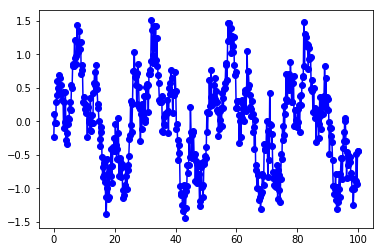

In [3]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [4]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,5,Wmax=0.5,Qmax=2.0,phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,3,Wmax=0.5,Qmax=2.0,phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,1,Wmax=0.5,Qmax=2.0,phase=1j))

In [67]:
minim = minimizer.CMA(parallel=False)
minim.train(mse(), M, X, Y, maxiter=2000)

CMA on 1 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=915986, Sat Nov  4 23:03:27 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 2.198281274919393e-01 1.0e+00 9.39e-01  9e-01  9e-01 0:00.0
    2     28 2.145477649977003e-01 1.1e+00 9.13e-01  9e-01  9e-01 0:00.3
    3     42 2.171531430753271e-01 1.1e+00 8.94e-01  9e-01  9e-01 0:00.6
   14    196 2.144203827335616e-01 1.3e+00 7.57e-01  7e-01  8e-01 0:03.6
   28    392 2.160121168251148e-01 1.4e+00 6.05e-01  6e-01  6e-01 0:07.8
   48    672 2.181702475971617e-01 1.5e+00 5.59e-01  5e-01  6e-01 0:12.8
   72   1008 2.187753324562960e-01 1.8e+00 5.03e-01  5e-01  5e-01 0:19.0
   97   1358 2.172267260459788e-01 2.1e+00 3.77e-01  3e-01  4e-01 0:26.0
  100   1400 2.174089254214839e-01 2.1e+00 3.92e-01  4e-01  4e-01 0:26.9
  131   1834 2.177085746096883e-01 2.3e+00 4.02e-01  3e-01  4e-01 0:36.0
  171   2394 2.119718846597061e-01 2.4e+00 3.52e-01  3e-01  4e-01 0:46.1
  200   2

array([ 3.25569965e+00,  9.99943863e+00,  6.10970753e-01, -4.67112301e+00,
       -7.17027342e-01, -2.50018672e-01,  9.98151593e+00,  8.45491967e+00,
        9.07220168e-01, -3.21918810e+00, -5.68443968e+00, -5.82684588e+00,
        8.81126369e+00,  9.39424726e+00,  9.88636645e+00, -4.77537498e+00,
        1.24425460e+00,  9.22283398e-01, -6.37562430e-01, -3.65849970e+00,
        1.08677645e+00,  9.99273718e+00,  9.09504942e+00,  6.27307631e+00,
       -3.04049743e-03,  9.79006627e+00,  6.09767102e+00,  1.20832600e+00,
        3.03039186e-01])

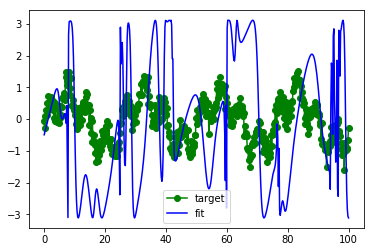

In [95]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit')
plt.legend()

In [89]:
M.get_layer(1)._Nout

5

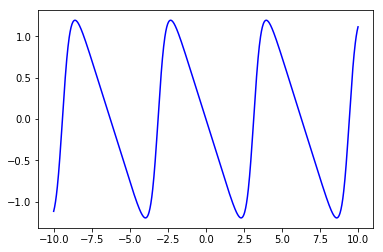

In [92]:
M.get_layer(1).show_activation(5,10)

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

minim = minimizer.SGD()
minim.train(mse(), M, X, Y, maxiter=300, batch_size=100)

Iteration 0 in 0.55(s), cost = 0.235159


In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example: Intrawave modulation

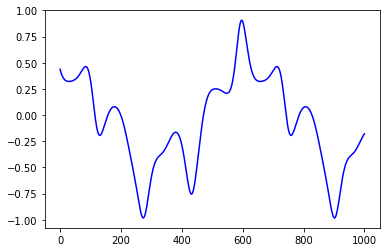

In [108]:
def func(x,n):
    return np.cos(0.01*x+0.5*np.cos(0.05*x))/(2+np.sin(0.04*x))

X = np.linspace(0, 1000, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"b-")

In [109]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,5, phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,5, phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,3, phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1j))

In [ ]:
minim = minimizer.CMA(False)
minim.train(mse(), M, X, Y, maxiter=1000)

CMA on 1 cpu(s) enabled
(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 76 (seed=957952, Sat Nov  4 23:32:05 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     16 9.373115740169784e-02 1.0e+00 9.55e-01  1e+00  1e+00 0:00.1
    2     32 9.479861055124332e-02 1.0e+00 9.26e-01  9e-01  9e-01 0:00.8
    3     48 9.367815092046572e-02 1.0e+00 9.01e-01  9e-01  9e-01 0:01.8
    8    128 9.369062248322947e-02 1.1e+00 8.65e-01  9e-01  9e-01 0:05.3
   14    224 9.375561359203556e-02 1.1e+00 8.66e-01  9e-01  9e-01 0:09.9
   21    336 9.366935354780347e-02 1.2e+00 8.54e-01  8e-01  9e-01 0:15.0
   29    464 9.367806370849792e-02 1.2e+00 8.80e-01  9e-01  9e-01 0:21.5
   39    624 9.367797880697916e-02 1.3e+00 8.43e-01  8e-01  9e-01 0:29.1
   52    832 9.367853323511124e-02 1.4e+00 7.83e-01  7e-01  8e-01 0:37.7
   66   1056 9.367913122154836e-02 1.4e+00 8.25e-01  8e-01  9e-01 0:47.2
   80   1280 9.367408413340141e-02 1.4e+00 9.01e-01  8e-01  9e-01 0:58.2
   94   1

In [ ]:
npoints = 1000
test_X = (np.linspace(0, 1000, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

# Example 3: Saw-tooth

In [96]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

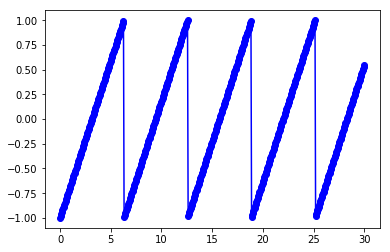

In [97]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [106]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,10, Wmax=0.5,Qmax=1,param_bound=10, phase=1j))
M.add(layers.DiagExpectationUnitLayer(10,1, Wmax=0.5,Qmax=1,param_bound=10, phase=1j))

minim = minimizer.CMA(parallel=False)
minim.train(mse(), M, X, Y, maxiter=1000)

CMA on 1 cpu(s) enabled
(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 42 (seed=969212, Sat Nov  4 23:21:25 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     15 3.416446399113628e-01 1.0e+00 9.38e-01  9e-01  9e-01 0:00.1
    2     30 2.184729745749791e-01 1.0e+00 9.09e-01  9e-01  9e-01 0:01.3
    3     45 1.664749287634297e-01 1.1e+00 9.15e-01  9e-01  9e-01 0:02.7
    7    105 1.583845044891005e-01 1.1e+00 1.03e+00  1e+00  1e+00 0:06.4
   13    195 1.594330241582100e-01 1.2e+00 1.13e+00  1e+00  1e+00 0:11.4
   21    315 1.596915543762763e-01 1.3e+00 1.09e+00  1e+00  1e+00 0:16.4
   32    480 1.599541378274204e-01 1.4e+00 1.01e+00  1e+00  1e+00 0:23.2
   45    675 1.599795497631722e-01 1.5e+00 9.28e-01  9e-01  1e+00 0:30.5
   58    870 1.602292132445989e-01 1.6e+00 8.18e-01  8e-01  9e-01 0:38.5
   77   1155 1.584288265788467e-01 1.6e+00 8.40e-01  8e-01  9e-01 0:47.9
  100   1500 1.585799335745325e-01 1.7e+00 1.10e+00  1e+00  1e+00 0:57.9
  125   1

array([-9.79927155, -8.8572008 ,  9.78484977,  9.11382857,  0.03362061,
        4.67832756, -9.99371082,  6.11317481,  8.05452343,  7.78488308,
        8.02274611,  1.17489293,  0.98096086,  8.45312638, -0.7615674 ,
       -4.89245444,  9.60281654, -0.06223631, -3.92502072,  9.67772462,
        8.41164644,  9.95396728,  4.48997307,  9.5848077 ,  9.46872204,
        6.51977705,  9.27774466,  9.9991046 ,  9.93674213,  9.94105696,
       -2.95547145, -4.25266969, -4.97685457, -7.37200155, -2.25402652,
        3.36131626,  0.25389929,  8.3563896 , -9.85843525,  4.34260676,
       -7.05042457,  2.75251396])

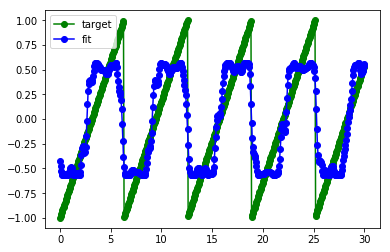

In [107]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
#plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [ ]:
M = mdl.Model()
#M.add(layers.Linear(784,1,paramBound=100))
M.add(layers.DiagExpectationUnitLayer(784,1,Qmax=5,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(784,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(25,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(10,1))
#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#T=enc.transform(Y_train)


In [ ]:
minim = minimizer.CMA(True)

sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_train))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_test))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))